<a href="https://colab.research.google.com/github/mimiiii1/fullstack/blob/main/Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Ahmed

ID:52-17043

Tutorial: T03

---

Name: Mariam Mohamed

ID: 52-1830

Tutorial: T03

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-309-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:

categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


We inspected the dataset by showing the unique values of each column and the count of each unique value ,
then checking if any column has any null value also we checked the data types of the columns to discover any inconsistencies
and created categorical cols df to seperate the numerical from categorical

## Data Cleaning

In [ ]:
df.drop('customerID', axis="columns", inplace=True)
#removed customer id as it is irrelevant to the dataset outcomes


In [ ]:
categorical_col.remove('customerID') #removing it from categorical columns

In [ ]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract(r'(\d+)', expand=False).astype('int64')
df.info()
#extracting digits from this column and change its type to int as it is int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   tenure            7032 non-null   int64 
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   InternetService   7032 non-null   object
 8   OnlineSecurity    7032 non-null   object
 9   OnlineBackup      7032 non-null   object
 10  DeviceProtection  7032 non-null   object
 11  TechSupport       7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
 17  MonthlyCharges

In [ ]:
categorical_col.remove('MonthlyCharges') #as it is not  categorical

In [ ]:
categorical_col.remove('TotalCharges') #as it is not  categorical

In [ ]:
df['SeniorCitizen'].astype('object') #as seniorcitizen is binary of 2 values and i want to drop one after encoding it

0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: SeniorCitizen, Length: 7032, dtype: object

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}) #to be more clear
df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: SeniorCitizen, Length: 7032, dtype: object

In [ ]:
categorical_col.append('SeniorCitizen') #adding it to categorical cols bec it is categorical

In [ ]:
categorical_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.extract(r'(\d+)', expand=False), errors='coerce').fillna(0).astype('int64')
df['TotalCharges']
#extacting digits from this column and change its type to int

0         29
1       1889
2        108
3       1840
4        151
        ... 
7027    1990
7028    7362
7029     346
7030     306
7031    6844
Name: TotalCharges, Length: 7032, dtype: int64

In [ ]:
# Calculate the mean of the 'TotalCharges' column excluding zeros
non_zero_mean = df.loc[df['TotalCharges'] != 0, 'TotalCharges'].mean()

# Replace zeros with the mean of non-zero values
df['TotalCharges'] = df['TotalCharges'].replace(0, non_zero_mean)
df['TotalCharges'].unique()

array([  29., 1889.,  108., ..., 1990., 7362., 6844.])

In [ ]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']
#contract is ordinal so in order to label encode it i must order the values from min to max

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [ ]:
df['Churn']=df['Churn'].astype('category').cat.codes
df['Churn']
#encode the binary 'churn' column into its numerical equivalent for use in the bar plot and correlation matrix

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [ ]:
#categorical col basically to group values that will be encoded so i will remove the 'churn'
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')


we dropped the customer_id column and created a dataframe for categorical columns

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**


**Visualization**

In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts() / df['Churn'].count() #imbalanced classes

0   0.73
1   0.27
Name: Churn, dtype: float64

<ipython-input-332-26c653dbdeeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

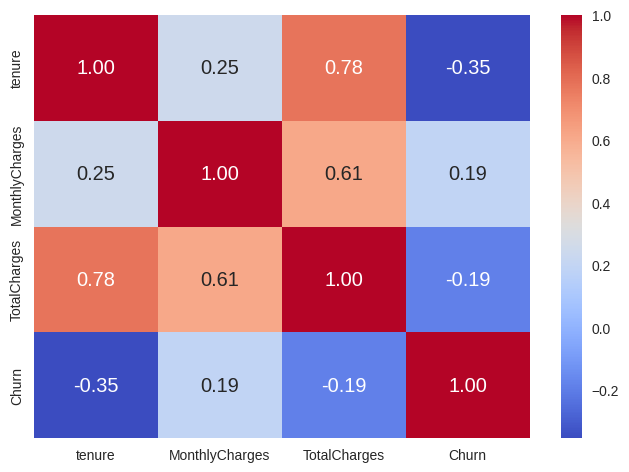

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


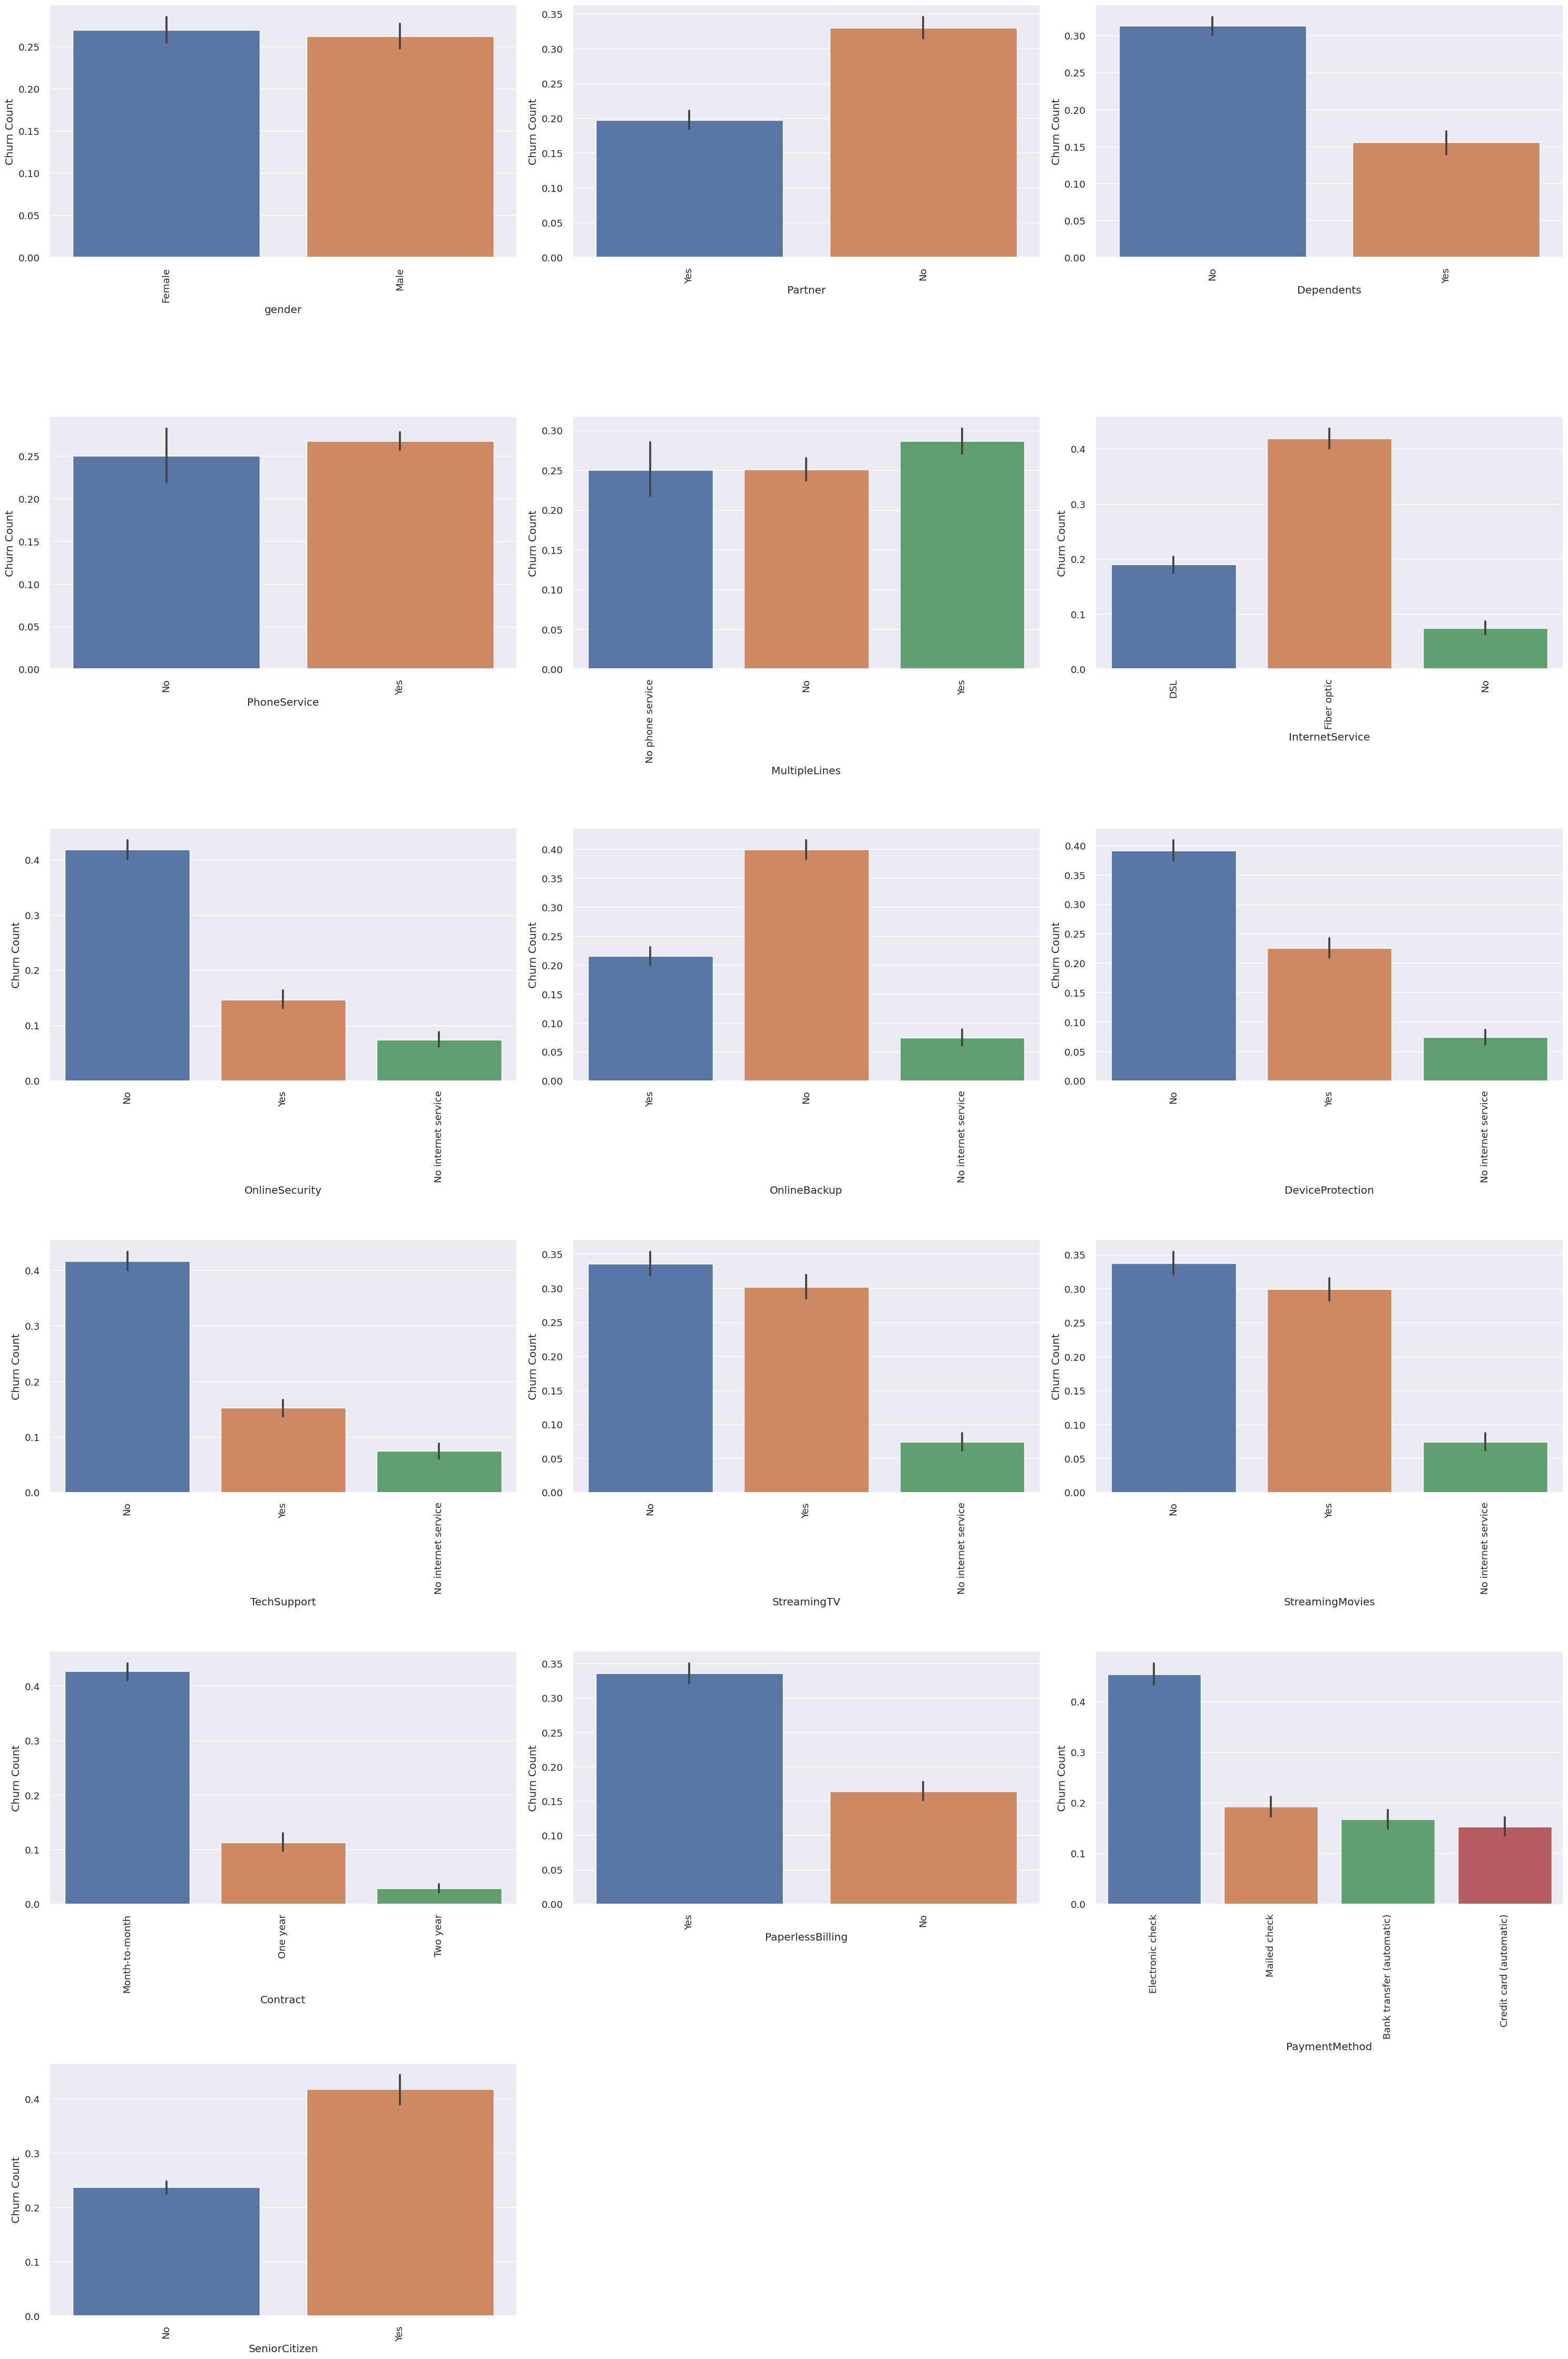

In [ ]:
num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)


sns.set(font_scale=1.2)
plt.figure(figsize=(30, 45))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Answer for Q1**:
to know the most Correlated columns with attributes we used to visualization tools which are heatmap for numerical values and it showed that there is no strong correlation between any of the numerical values(tenure, monthlycharges and totalcharges) with churn and we used barplot to view the categorical columns and based on the plots the columns that is highly correlated with churn are ( Partner ,Dependents,internetservice , seniorCitizen, PaperlessBilling,TechSupport,streamingTv,StreamingMovies) this interpretation is based on the changing values of churn with the value of the categorical attribute , also based on the barPlot StramingTc and StramingMovies attributes are nearly the same so we will drop the StreamingTv Column


**Q2: Which payment method has the highest churn rate?**

**Visualization**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

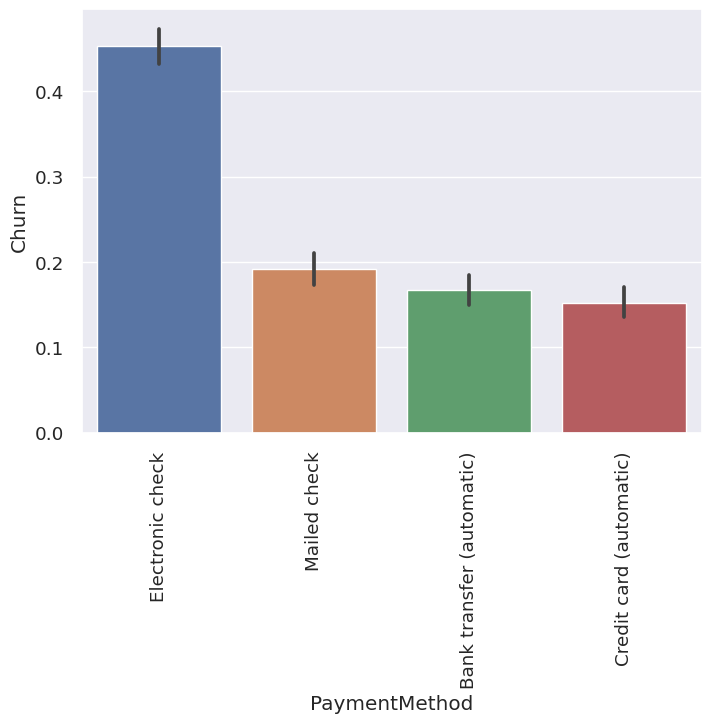

In [ ]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.xticks(rotation=90)


**Answer for Q2**: the electronic check method has the highest churn rate compared to other methods

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

25th Percentile: 9.0 months
Median (50th Percentile): 29.0 months
75th Percentile: 55.0 months


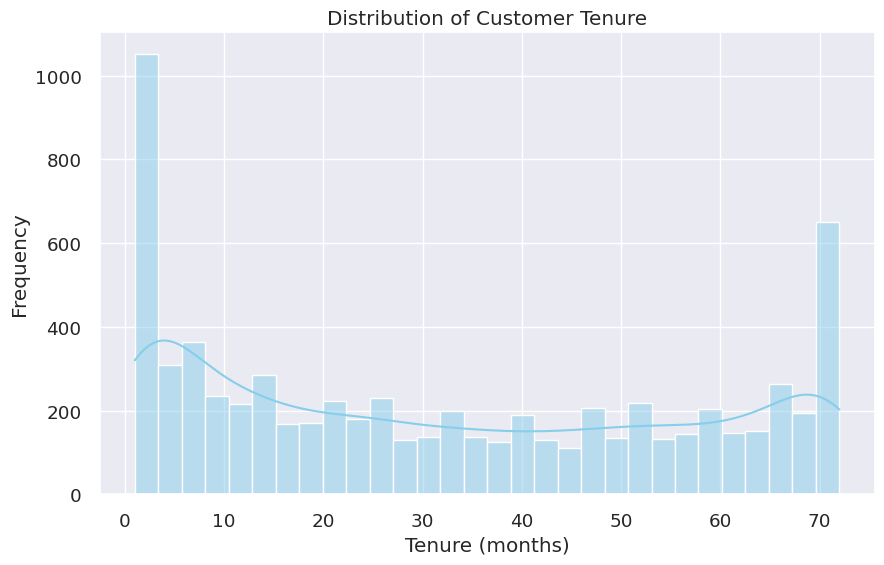

In [ ]:

# Display descriptive statistics
tenure_stats = df['tenure'].describe(percentiles=[0.25, 0.5, 0.75])

# Extract the relevant percentiles
percentile_25 = tenure_stats['25%']
median = tenure_stats['50%']
percentile_75 = tenure_stats['75%']

print(f"25th Percentile: {percentile_25} months")
print(f"Median (50th Percentile): {median} months")
print(f"75th Percentile: {percentile_75} months")

# Visualize the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()


**Answer for Q3**: customers commonly churn after the first month

## Data Preparation for Modelling

In [ ]:
df_encoded=df.copy()

In [ ]:
# Since we've already 'BusinessTravel' is already of type 'category',
# we can use its .cat.codes attribute to preserve its order

df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [ ]:
categorical_features.remove('Contract')
 #since i already labeled encoded this variable then i should remove it

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.head()  #encoding nominal categoricals

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_No,SeniorCitizen_Yes
0,1,0,29,29.00,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,34,1,56,1889.00,0,0,1,1,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2,0,53,108.00,1,0,1,1,0,1,...,0,0,0,1,0,0,0,1,1,0
3,45,1,42,1840.00,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,2,0,70,151.00,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
df_encoded.columns

Index(['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank

In [ ]:
df_encoded.drop(['Partner_No', 'gender_Female','Dependents_No','PhoneService_No','PaperlessBilling_No','SeniorCitizen_No'], axis='columns', inplace=True)
df_encoded.head()
#We'll just need to remove the redundant duplicate binary columns before proceeding

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_Yes
0,1,0,29,29.00,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,34,1,56,1889.00,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
2,2,0,53,108.00,1,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3,45,1,42,1840.00,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2,0,70,151.00,1,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph


## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.05%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.99    1.00      0.99       0.99          0.99
recall       1.00    0.97      0.99       0.98          0.99
f1-score     0.99    0.98      0.99       0.99          0.99
support   3614.00 1308.00      0.99    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3608    6]
 [  41 1267]]

Test Result:
Accuracy Score: 70.33%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.81   0.45      0.70       0.63          0.71
recall       0.78   0.49      0.70       0.64          0.70
f1-score     0.79   0.47      0.70       0.63          0.71
support   1549.00 561.00      0.70    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1208  341]
 [ 

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4473257698541329
Recall:  0.4919786096256685
F1_score:  0.468590831918506


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.49642005, 0.50610433, 0.4785553 ])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.49 (+/- 0.02)


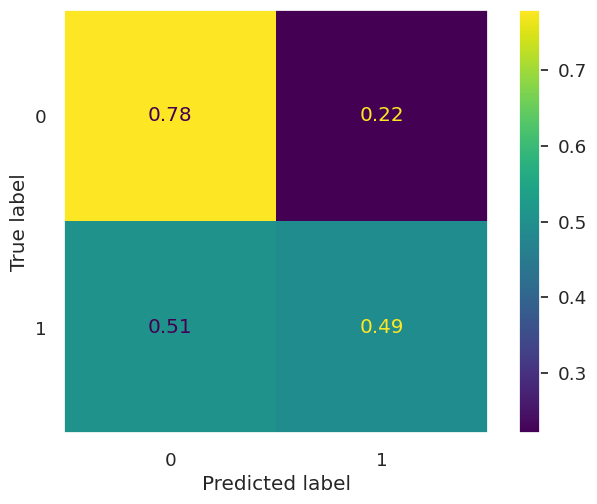

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

The model performs exceptionally well with the training data, demonstrating strong accuracy and excellent precision-recall metrics. But when the test dataset that hasn't been viewed yet is used, its effectiveness somewhat decreases.
Although the model performs quite well on the training set, suggesting a great match, it has difficulties when generalizing to new data.The decline in performance on the test set indicates that the model may be subject to overfitting to the training set, emphasizing the need for modifications or regularization strategies to improve the model's capacity to generalize to new data.

## Bonus (Optional)